# Imports

In [1]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = "/n/holylabs/LABS/idreos_lab/Users/azhao/gpu_profiling/data/bandwidth/a100.csv"
orig_df = pd.read_csv(data_dir)
orig_df

,dtype,Size,Time
0,b16,256,0.016384
1,16,256,0.016384
2,32,256,0.016384
3,b16,1280,0.016384
4,16,1280,0.016384
...,...,...,...
187,16,63744,188.986877
188,32,63744,377.800186
189,b16,64768,195.372543
190,16,64768,195.457535


In [3]:
dtype_to_bytes = {
    "b16": 2,
    "16": 2,
    "32": 4
}

orig_df["GFLOPs"] = orig_df.apply(lambda row: (row["Size"] ** 2) * dtype_to_bytes[row["dtype"]] / 1e9, axis=1)
orig_df

,dtype,Size,Time,GFLOPs
0,b16,256,0.016384,0.000131
1,16,256,0.016384,0.000131
2,32,256,0.016384,0.000262
3,b16,1280,0.016384,0.003277
4,16,1280,0.016384,0.003277
...,...,...,...,...
187,16,63744,188.986877,8.126595
188,32,63744,377.800186,16.253190
189,b16,64768,195.372543,8.389788
190,16,64768,195.457535,8.389788


In [32]:
# temp = orig_df[orig_df["Time"].str.startswith("CUDA out of memory.")].reset_index()
# temp

<Axes: >

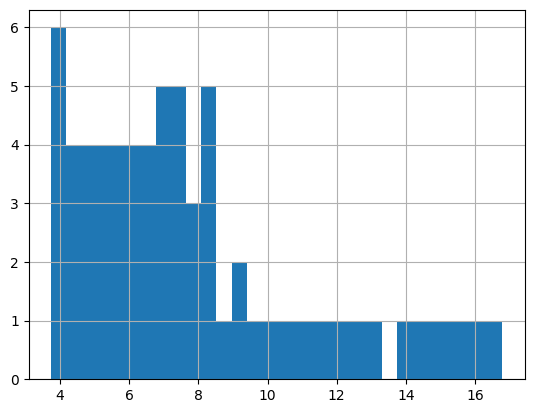

In [ ]:
temp["GFLOPs"].hist(bins=30)

In [ ]:
temp.loc[1, "Time"]

'CUDA out of memory. Tried to allocate 3.49 GiB. GPU 0 has a total capacity of 19.50 GiB of which 2.46 GiB is free. Including non-PyTorch memory, this process has 17.00 GiB memory in use. Of the allocated memory 16.78 GiB is allocated by PyTorch, and 17.38 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)'

<Axes: >

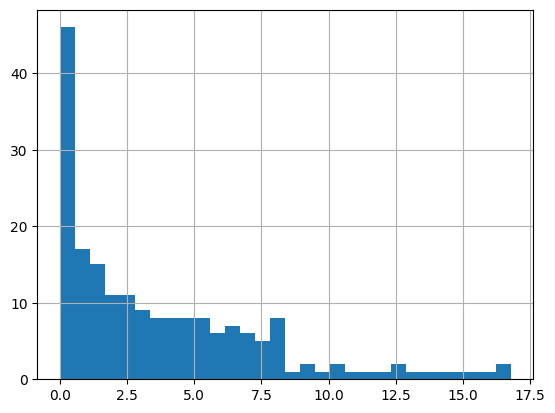

In [5]:
# df = orig_df[~orig_df["Time"].str.startswith("CUDA out of memory.")].reset_index()
df = orig_df
df["Time"] = df["Time"].astype(float)
df["GFLOPsPerMs"] = df["GFLOPs"] / df["Time"]
df["GFLOPs"].hist(bins=30)

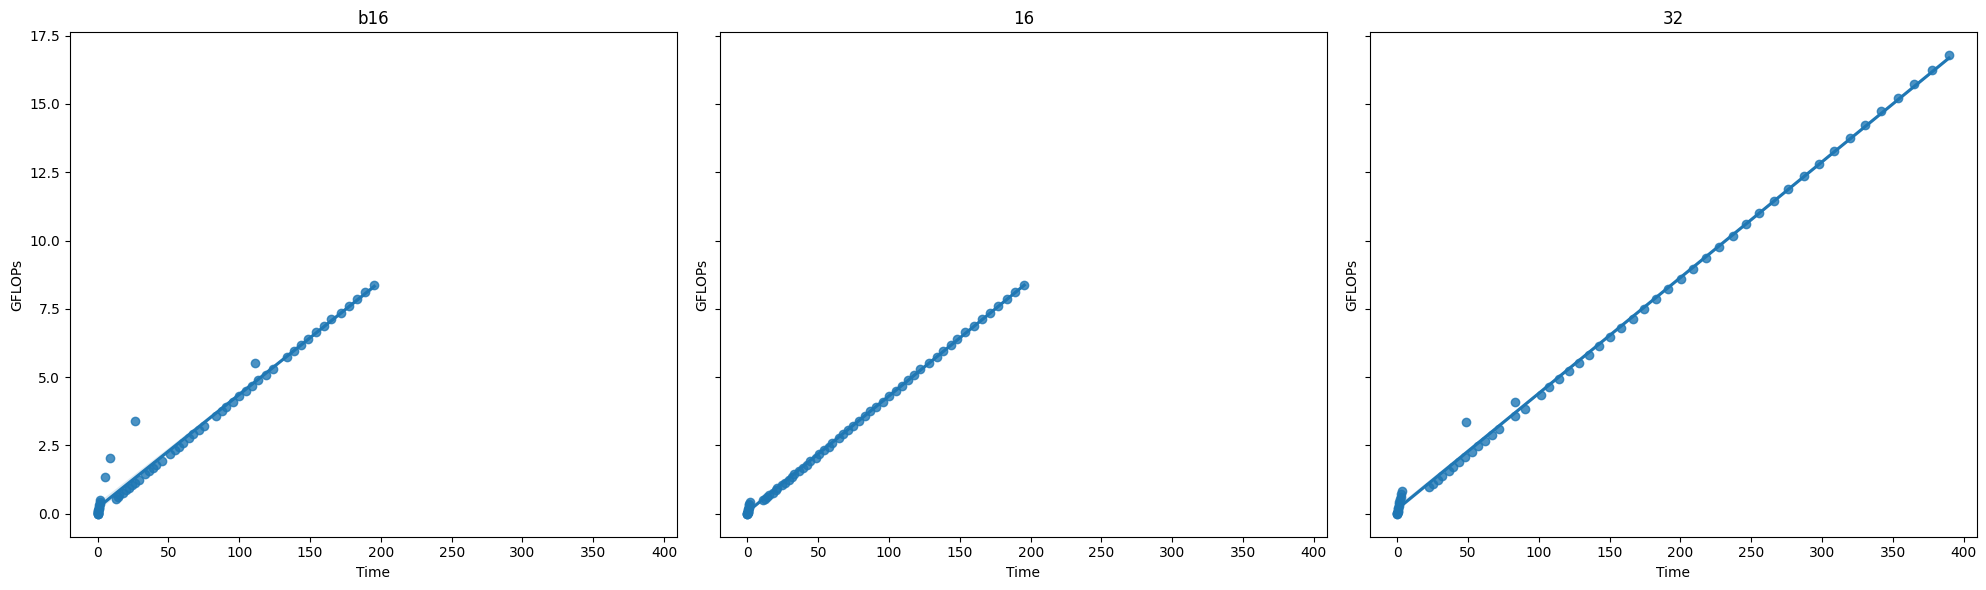

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)
axes = axes.flatten()

for idx, dtype in enumerate(dtype_to_bytes.keys()):
    ax = axes[idx]
    sns.regplot(x="Time", y="GFLOPs", data=df.query(f"dtype == '{dtype}'"), ax=ax)
    ax.set_title(dtype)

plt.tight_layout()
plt.show()

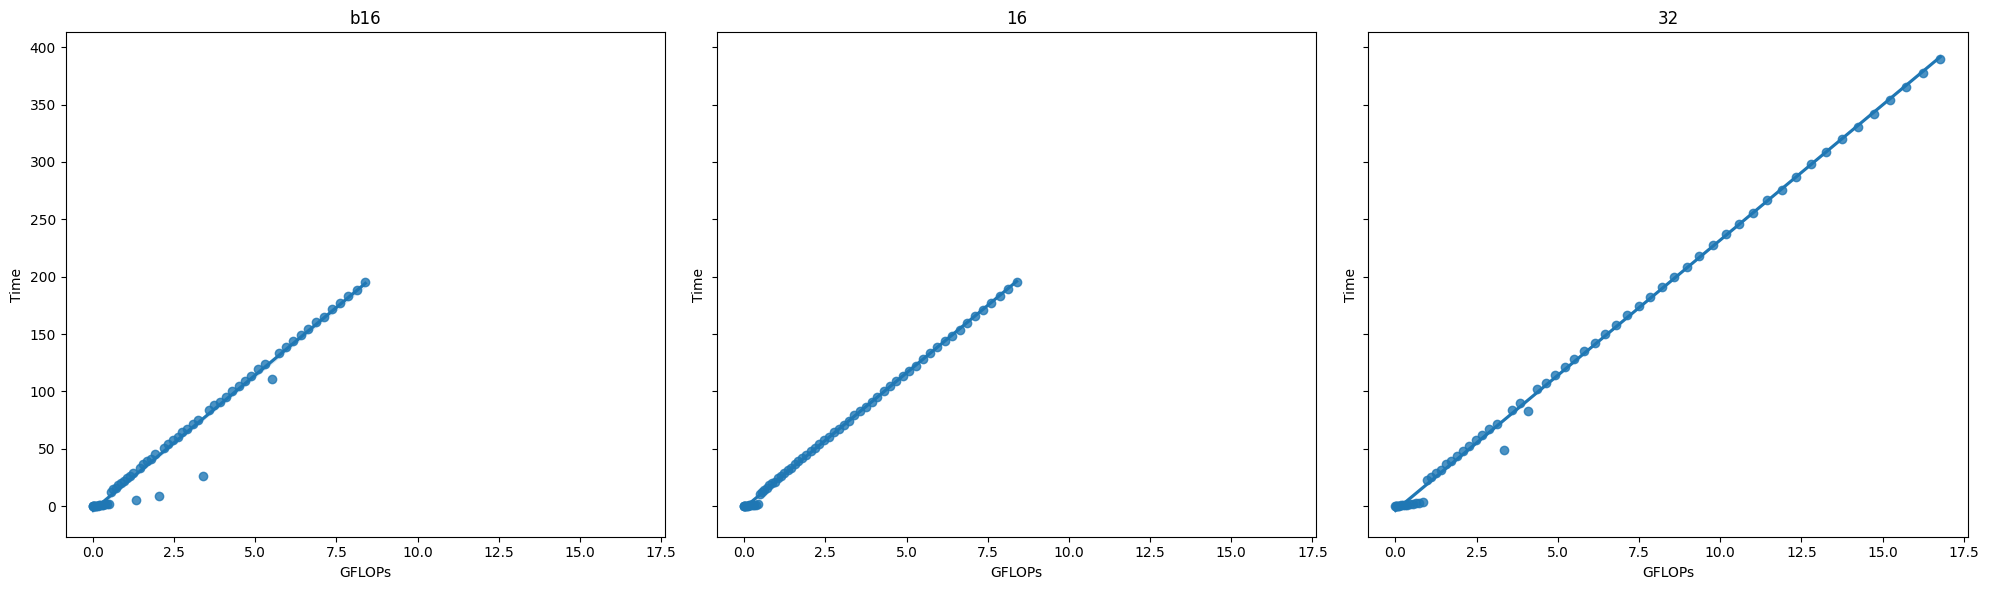

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)
axes = axes.flatten()

for idx, dtype in enumerate(dtype_to_bytes.keys()):
    ax = axes[idx]
    sns.regplot(x="GFLOPs", y="Time", data=df.query(f"dtype == '{dtype}'"), ax=ax)
    ax.set_title(dtype)

plt.tight_layout()
plt.show()

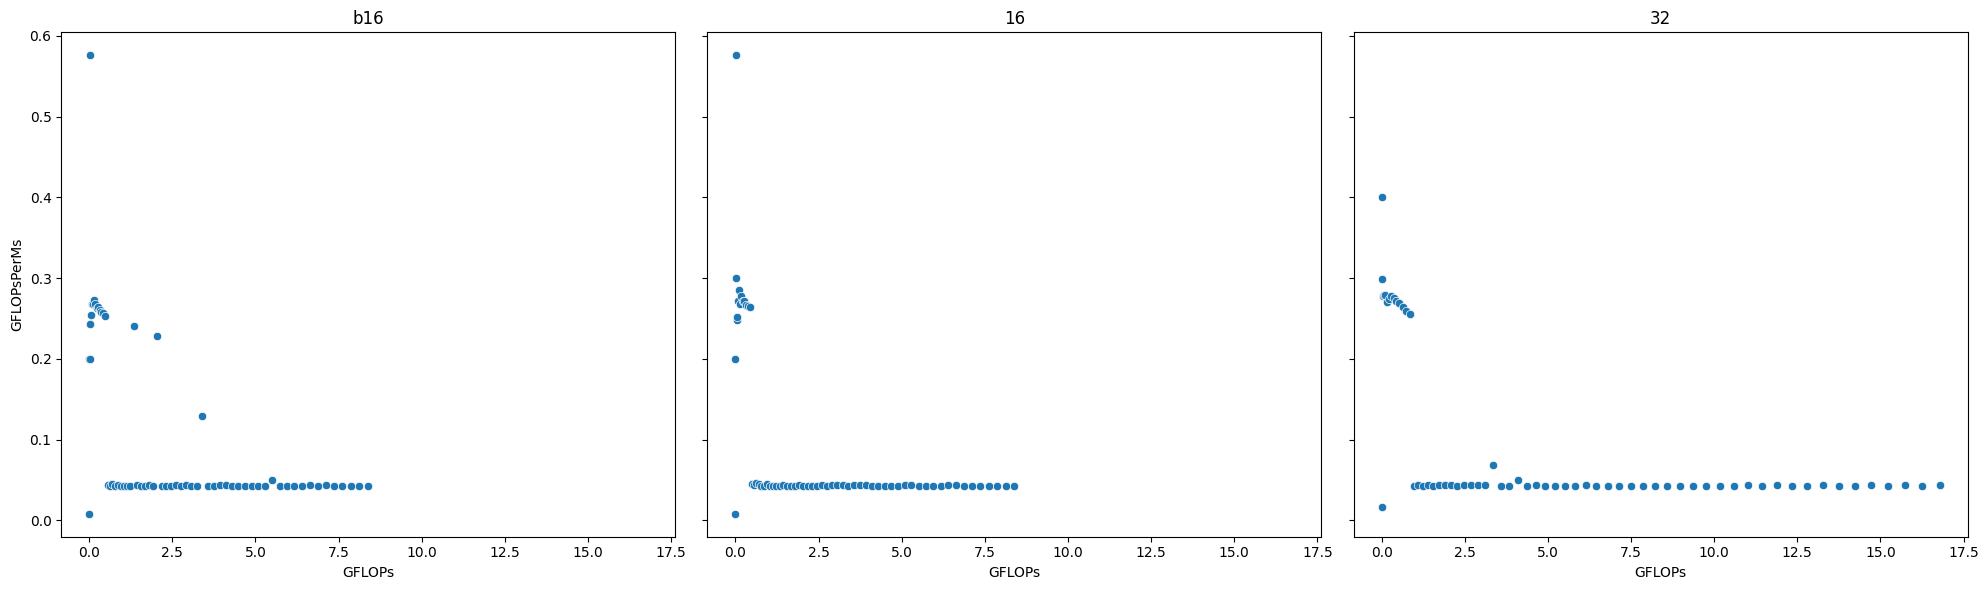

In [29]:
# Idt this graph makes sense

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True, sharey=True)
axes = axes.flatten()

for idx, dtype in enumerate(dtype_to_bytes.keys()):
    ax = axes[idx]
    sns.scatterplot(x="GFLOPs", y="GFLOPsPerMs", data=df.query(f"dtype == '{dtype}'"), ax=ax)
    ax.set_title(dtype)

plt.tight_layout()
plt.show()

In [26]:
import statsmodels.api as sm
model = sm.OLS(df["GFLOPs"], df["Time"])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 GFLOPs   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          7.439e+04
Date:                Sat, 17 Aug 2024   Prob (F-statistic):                   1.84e-249
Time:                        13:38:39   Log-Likelihood:                         -22.620
No. Observations:                 192   AIC:                                      47.24
Df Residuals:                     191   BIC:                                      50.50
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Time           0.0431      0.000    272.746      0.000       0.043       0.043
==============================================================================
Omnibus:                      239.029   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9702.196
Skew:                           5.250   Prob(JB):                         0.00
Kurtosis:                      36.204   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: >

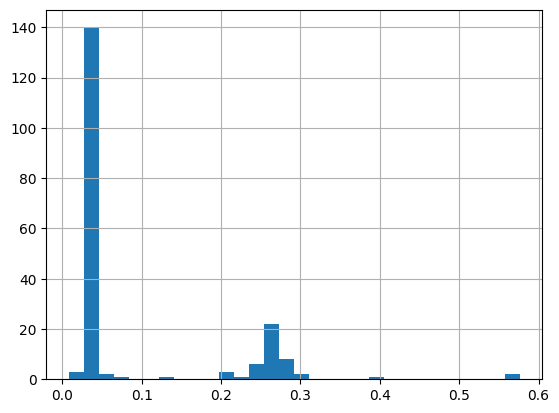

In [17]:
(df["GFLOPs"] / df["Time"]).hist(bins=30)

In [ ]:
"""
0.043 GFLOPs/ms => 43 GFLOPs/s.

Might be max? Seems sus...

"""